##### https://towardsdatascience.com/how-to-convert-pandas-dataframe-to-keras-rnn-and-back-to-pandas-for-multivariate-regression-dcc34c991df9
##### https://medium.com/neuronio-br/prevendo-valores-de-a%C3%A7%C3%B5es-com-lstm-b7b3a737aa4
##### https://www.analyticsvidhya.com/blog/2021/06/complete-guide-on-how-to-use-autoencoders-in-python/
##### https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

In [32]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()

In [2]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [19]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [21]:
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [22]:
input_img= Input(shape=(784,))
encoded = Dense(units=32, activation='relu')(input_img)
decoded = Dense(units=784, activation='sigmoid')(encoded)


In [23]:
autoencoder=Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [24]:
encoder = Model(input_img, encoded)
encoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [25]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
X_train.shape
X_test.shape

(10000, 784)

In [27]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2729 - accuracy: 0.0114 - val_loss: 0.1862 - val_accuracy: 0.0111
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1681 - accuracy: 0.0126 - val_loss: 0.1515 - val_accuracy: 0.0123
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1428 - accuracy: 0.0112 - val_loss: 0.1325 - val_accuracy: 0.0092
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1275 - accuracy: 0.0104 - val_loss: 0.1200 - val_accuracy: 0.0084
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1169 - accuracy: 0.0105 - val_loss: 0.1114 - val_accuracy: 0.0102
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1097 - accuracy: 0.0110 - val_loss: 0.1053 - val_accuracy: 0.0114
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1047 - accuracy: 0.0108 - val_loss: 0.1016 - val_accuracy: 0.0116
Epoch 

In [28]:
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

In [29]:
encoded_imgs.shape

(10000, 32)

In [30]:
predicted.shape

(10000, 784)

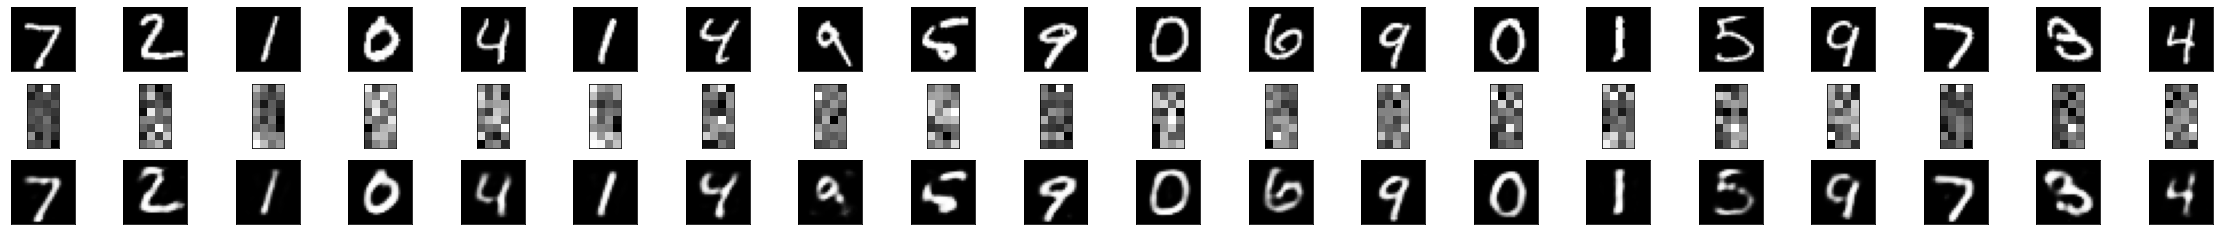

In [32]:
plt.figure(figsize=(40, 4))
for i in range(20):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    
plt.show()

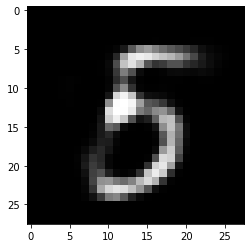

In [33]:
plt.imshow(predicted[45].reshape(28, 28))

In [34]:
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling
X_train_reshape = X_train.reshape(60000,28*28)
X_train_reshape.shape
#y = np.zeros((2, 3, 4))
#y
X_train_reshape

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

[BernoulliRBM] Iteration 1, pseudo-likelihood = -111.82, time = 5.20s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -98.88, time = 5.93s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -92.27, time = 5.92s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -88.27, time = 5.94s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -85.62, time = 5.89s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -83.23, time = 5.88s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.67, time = 5.87s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -80.84, time = 5.86s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -79.48, time = 5.88s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -79.01, time = 5.89s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -78.09, time = 5.97s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -78.29, time = 5.91s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -77.67, time = 5.92s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -78.21, time = 5.93s
[BernoulliRBM] Iteration 15,

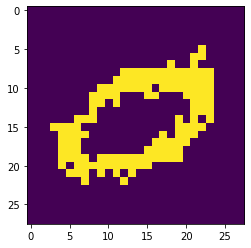

In [49]:
from sklearn.neural_network import BernoulliRBM
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()

X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling

rbm = BernoulliRBM(n_components=100, n_iter=30, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train_reshape)

xx = X_train_reshape[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

import matplotlib.pyplot as plt

plt.imshow(xx[0].reshape(28, 28))

<Figure size 432x288 with 0 Axes>

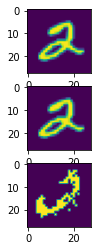

In [68]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(3,1) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
index=5
axarr[0].imshow(X_train[index])
axarr[1].imshow(X_train_reshape[index].reshape(28, 28))
axarr[2].imshow(xx[index].reshape(28, 28))
#plt.imshow(X_train[1])

#plt.imshow(X_train_reshape[1].reshape(28, 28))